In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Real estate.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.shape

(414, 8)

In [5]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [7]:
df.drop(["No", "X1 transaction date", 'X5 latitude', 'X6 longitude'],axis = 1,inplace = True)

In [8]:

# df['X5 latitude']=df['X5 latitude'] * df['X6 longitude']

# df.drop(['X6 longitude'],axis=1,inplace=True)


In [9]:
df.isnull().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
Y house price of unit area                0
dtype: int64

In [10]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 13.1 KB


In [12]:
df.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,-0.210567,-0.673613,0.571005,1.000000


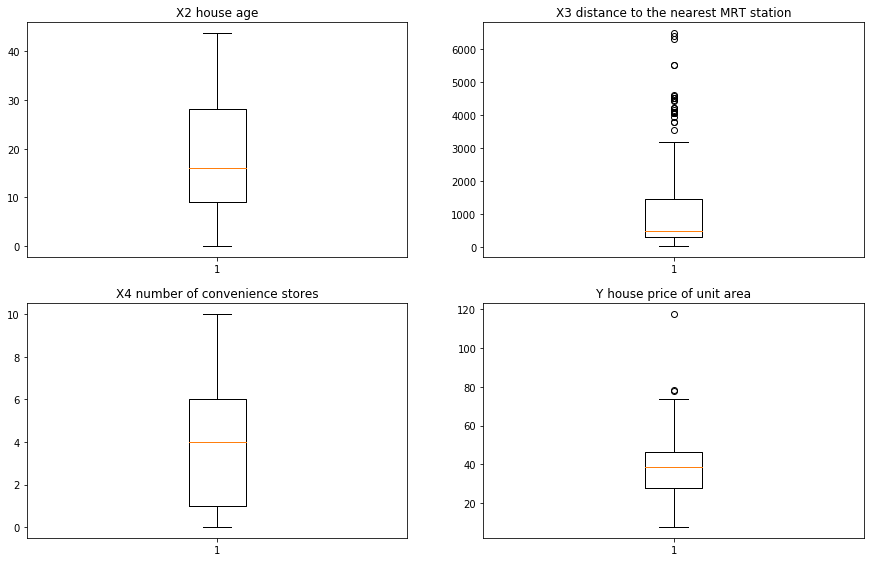

In [13]:
# checking outliers in each features
plt.figure(figsize = (15,25))
count = 1
for col in df:
    if(df[col].dtype == 'O'):
        print("Unique values in {} = {}".format(col,df[col].unique()))
    else:
        plt.subplot(5,2,count)
        plt.boxplot(df[col])
        plt.title(col)
        count +=1
        
plt.show()

In [14]:
# Splitting in to X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [16]:
# y.shape

In [17]:
y = y.reshape(-1,1)

In [18]:
y.shape

(414, 1)

In [40]:
# Splitting in to train and Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.15, random_state =56)

In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(351, 3) (63, 3) (351, 1) (63, 1)


In [42]:
# Model Building
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
# d1 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
# d1

In [45]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
print("r2 score : ", r2_score(y_pred, y_test))
print("Mean squared Error: ",mean_squared_error(y_pred, y_test) )


r2 score :  0.6631713205158727
Mean squared Error:  43.58686511983879
